In [1]:
# Урок 1
df  <- mtcars

cor.test(x = df$mpg, y = df$hp)
fit  <- cor.test(x = df$mpg, y = df$hp)

cor.test(~ mpg + hp, df)

str(fit)

fit$p.value
fit$
plot(x = df$mpg, y = df$hp)

ggplot(df, aes(x = mpg, y = hp, col = factor(cyl)))+
  geom_point(size = 5)+
  facet_grid(. ~ am)


###########################################

df  <- mtcars
df_numeric  <- df[, c(1,3:7)]

pairs(df_numeric)

cor(df_numeric)

fit  <- corr.test(df_numeric)
fit$r # значения
fit$p # p-value
fit$adjust


### Пример 1
# Напишите функцию corr.calc, которая на вход получает data.frame с двумя количественными переменными,
# рассчитывает коэффициент корреляции Пирсона и возвращает вектор из двух значений:
# коэффициент корреляции и p - уровень значимости.

# Пример работы функции:
# > corr.calc( mtcars[, c(1,5)] )  # на вход подаем данные mtcars только с переменными mpg и drat
# [1] 0.6811719078 0.0000177624

# > corr.calc( iris[,1:2] ) # на вход подаем данные iris только с переменными Sepal.Length и Sepal.Width
# [1] -0.1175698 0.1518983

#При написании функции обратите внимание, что названия переменных входящего dataframe могут быть произвольными.
# Пишите функцию с учетом, что она должна работать на любом  dataframe с двумя количественными переменными как в примере выше.
# Не забудьте подгрузить библиотеку library(psych), если хотите использовать ее при решении этой задачи.


corr.calc1 <- function(test_data){
  colnames(test_data) <- c('V1', 'V2')
  fit <- cor.test(~V1 + V2, test_data )
  print(c(fit$estimate, fit$p.value))
}

corr.calc2 <- function(test_data){
  fit <- cor.test(x = test_data[[1]], y = test_data[[2]] )
  print(c(fit$estimate, fit$p.value))
}

corr.calc2( mtcars[, c(1,5)] )


### Пример 2
# Напишите функцию filtered.cor которая на вход получает data.frame с  произвольным количеством переменных
# (как количественными, так и любых других типов), рассчитывает коэффициенты корреляции Пирсона между всеми парами
# количественных переменных и возвращает наибольшее по модулю значение коэффициента корреляции.
# (То есть функция может вернуть -0.9, если это наибольшая по модулю  корреляция).
# Гарантируется наличие в data.frame хотя бы двух количественных переменных.
# Обратите внимание: при проверке вашей функции на вход будут подаваться данные с различными именами колонок.
# Ваша функция должна корректно работать независимо от имен переменных.
# Перед тем, как сдавать решение, убедитесь, что ваша функция работает корректно на разных данных, с разными именами колонок.
#
# Данные для тренировки:
# https://stepic.org/media/attachments/lesson/11504/step6.csv
# step6 <-  read.table("step6.csv",  header=TRUE, sep=',' )
# > filtered.cor(step6)
# [1] 0.235997
#
# > filtered.cor(my_df) #вымышленные данные, где максимальная по модулю корреляция отрицательна
# [1] -0.9
#
# > filtered.cor(iris)
# [1] 0.9628654
#
# > iris$Petal.Length <- -iris$Petal.Length # сделаем отрицательной максимальную по модулю корреляцию
# > filtered.cor(iris)
#
# [1] - 0.9628654


filtered.cor1 <- function(x){
res <- x[ , sapply(x, is.numeric)]
res <- cor(res, method = "pearson", use = "complete.obs")
diag(res) <- 0
res[which.max(abs(res))]
}

filtered.cor2 <- function(x){
num_var <- sapply(x, function(x) is.numeric(x))
cor_mat <- cor(x[, num_var])
diag(cor_mat) <- 0
return(cor_mat[which.max(abs(cor_mat))])
}

library('psych')
filtered.cor3 <- function(x){
    fit <- corr.test(x[, unlist(lapply(x, is.numeric))])
    diag(fit$r) <- 0
    return(fit$r[which.max(abs(fit$r))])
}

filtered.cor1(iris)
# [1] 0.9628654

iris$Petal.Length <- -iris$Petal.Length # сделаем отрицательной максимальную по модулю корреляцию
filtered.cor2(iris)
# [1] - 0.9628654


#### Пример 3
# Напишите функцию smart_cor, которая получает на вход dataframe с двумя количественными переменными.
# Проверьте с помощью теста Шапиро-Уилка, что данные в обеих переменных принадлежат нормальному распределению.
# Если хотя бы в одном векторе распределение переменной отличается от нормального (p - value меньше 0.05),
# то функция должна возвращать коэффициент корреляции Спирмена. (Числовой вектор из одного элемента).
# Если в обоих векторах распределение переменных от нормального значимо не отличается, то функция должна возвращать коэффициент корреляции Пирсона.

#> test_data  <- read.csv("https://stepik.org/media/attachments/course/129/test_data.csv")
#> smart_cor(test_data)
#[1] -0.1031003

smart_cor1 <- function(x){
  a <- shapiro.test(x[[1]])
  b <- shapiro.test(x[[2]])
  if(a$p.value < 0.05 | b$p.value < 0.05){
    res <- cor.test(x[[1]], x[[2]], method = 'spearman')
  }
  else{
    res <- cor.test(x[[1]], x[[2]], method = 'pearson')
  }
  return (res$estimate)
}

smart_cor2 <- function(x){
if (shapiro.test(x[[1]])$p < 0.05 | shapiro.test(x[[2]])$p < 0.05) {
return(cor.test(x[[1]], x[[2]], method = 'spearman')$estimate)
} else {
return(cor.test(x[[1]], x[[2]], method = 'pearson')$estimate)}
}
smart_cor3 <- function(x){
  cor(x[[1]], x[[2]],
      method = if (shapiro.test(x[[1]])$p < 0.05 | shapiro.test(x[[2]])$p < 0.05) "spearman" else "pearson")
}

test_data  <- read.csv("https://stepik.org/media/attachments/course/129/test_data.csv")
str(test_data)
shapiro.test(test_data[[1]])
shapiro.test(test_data[[2]])
cor.test(test_data[[1]], test_data[[2]], method = "spearman")
cor.test(test_data[[1]], test_data[[2]], method = "pearson")
smart_cor3(test_data)


	Pearson's product-moment correlation

data:  df$mpg and df$hp
t = -6.7424, df = 30, p-value = 1.788e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8852686 -0.5860994
sample estimates:
       cor 
-0.7761684 



	Pearson's product-moment correlation

data:  mpg and hp
t = -6.7424, df = 30, p-value = 1.788e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8852686 -0.5860994
sample estimates:
       cor 
-0.7761684 


List of 9
 $ statistic  : Named num -6.74
  ..- attr(*, "names")= chr "t"
 $ parameter  : Named int 30
  ..- attr(*, "names")= chr "df"
 $ p.value    : num 1.79e-07
 $ estimate   : Named num -0.776
  ..- attr(*, "names")= chr "cor"
 $ null.value : Named num 0
  ..- attr(*, "names")= chr "correlation"
 $ alternative: chr "two.sided"
 $ method     : chr "Pearson's product-moment correlation"
 $ data.name  : chr "df$mpg and df$hp"
 $ conf.int   : num [1:2] -0.885 -0.586
  ..- attr(*, "conf.level")= num 0.95
 - attr(*, "class")= chr "htest"


[1] 1.787835e-07

ERROR: Error in eval(expr, envir, enclos): попытка применить не-функцию


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



	Pearson's product-moment correlation

data:  df$mpg and df$hp
t = -6.7424, df = 30, p-value = 1.788e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8852686 -0.5860994
sample estimates:
       cor 
-0.7761684 



	Pearson's product-moment correlation

data:  mpg and hp
t = -6.7424, df = 30, p-value = 1.788e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8852686 -0.5860994
sample estimates:
       cor 
-0.7761684 


List of 9
 $ statistic  : Named num -6.74
  ..- attr(*, "names")= chr "t"
 $ parameter  : Named int 30
  ..- attr(*, "names")= chr "df"
 $ p.value    : num 1.79e-07
 $ estimate   : Named num -0.776
  ..- attr(*, "names")= chr "cor"
 $ null.value : Named num 0
  ..- attr(*, "names")= chr "correlation"
 $ alternative: chr "two.sided"
 $ method     : chr "Pearson's product-moment correlation"
 $ data.name  : chr "df$mpg and df$hp"
 $ conf.int   : num [1:2] -0.885 -0.586
  ..- attr(*, "conf.level")= num 0.95
 - attr(*, "class")= chr "htest"


[1] 1.787835e-07

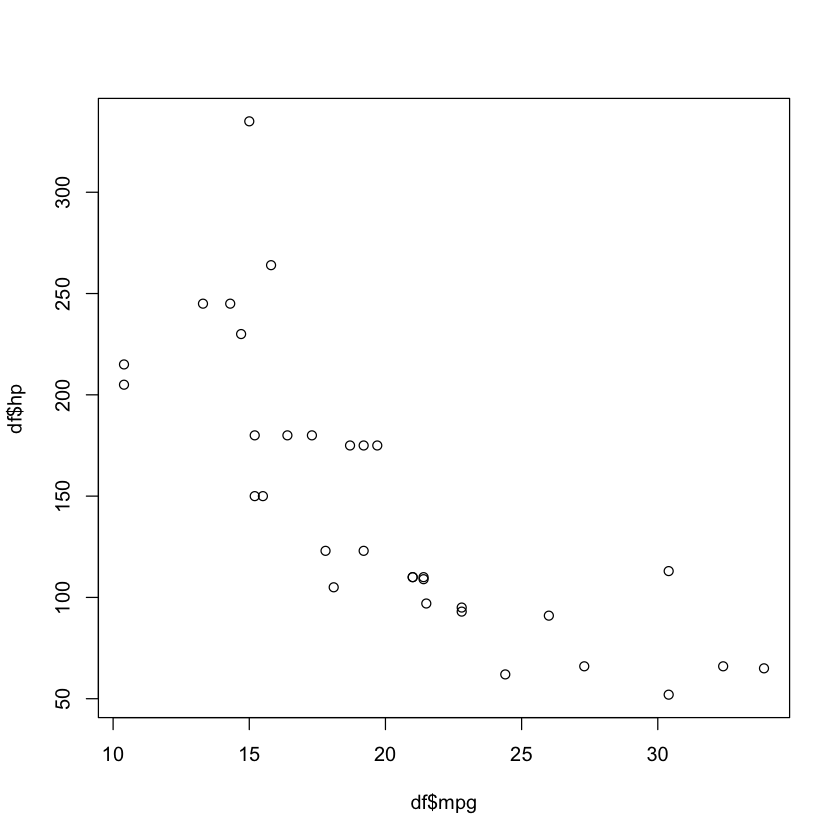

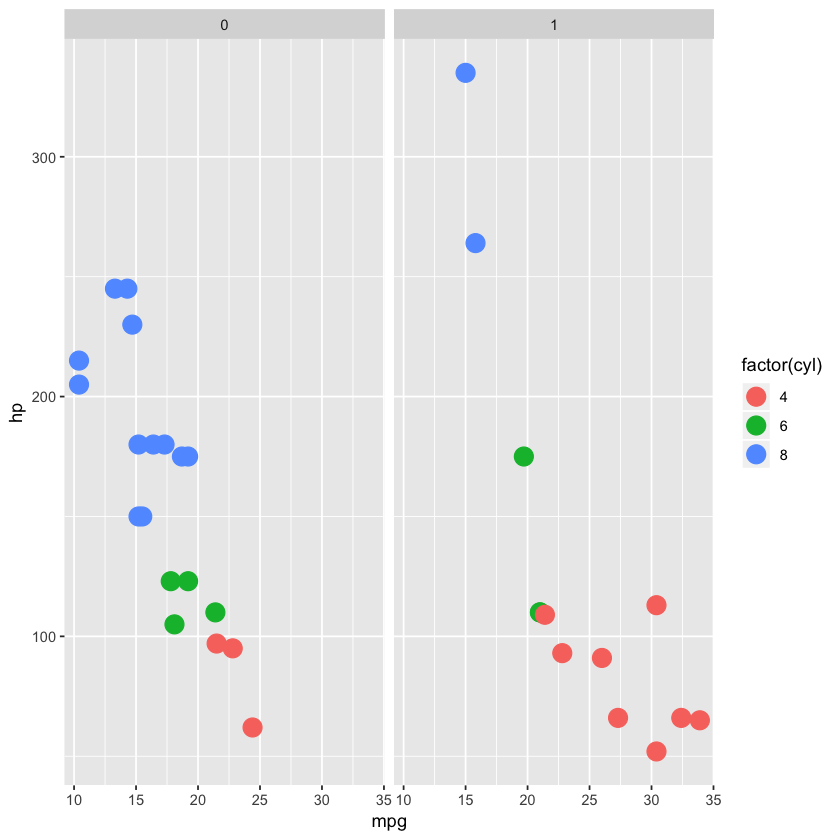

In [2]:
library(ggplot2)
df  <- mtcars

cor.test(x = df$mpg, y = df$hp)
fit  <- cor.test(x = df$mpg, y = df$hp)

cor.test(~ mpg + hp, df)

str(fit)

fit$p.value
plot(x = df$mpg, y = df$hp)

ggplot(df, aes(x = mpg, y = hp, col = factor(cyl)))+
  geom_point(size = 5)+
  facet_grid(. ~ am)
